<h1><center>Programming Sample: Data Visualization via matplotlib</center></h1>
<h2><center>By Jeshua Silvers</center></h2>

<h3><center>Part I: Process and Structure the Data</center></h3>

In [1]:
#Please Note: The original audience for this was my peers in a Python Programming Course
#Data Source: State of California Hydrology data from https://ca.water.usgs.gov/data/waterdata/

#PART a: Setting Up my Workspace by importing data related packages
    
#To use the more interesting aspects of matplotlib we need to import a file and be able to analyze
#data in that file. This requires the following packages:
import csv
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

from datetime import datetime
from datetime import timedelta

import warnings                   
warnings.filterwarnings("ignore") #Supresses Jupyter Notebook Warnings

#PART b: Open and Process data, collect relevant information

#Initialize Lists I Use to Capture Data From a CSV
dates = []
ISO_list = []
flow = []

#OPEN FILE: Collect Data row by row
with open('FLOW_DAILY_MEAN_DATA_raw.csv','r') as csvfile:
    #first we must read in the csv file to use it
    plots = csv.reader(csvfile, delimiter=',')
    
    next(plots) #Get to the first data containing row in the file
    next(plots) #The first row with data in it is the 4th row
    next(plots) #Using next 3 times gets us to the 4th row
    
    ISO = 0     #ISO = initial sort order
    
    #loop through each row and collect useful information from each
    #these rows are sliceable like a list, slice them to get info by column
    #ex. row[0] means column 1 in the current row
    
    for row in plots:
        ISO += 1
        dates.append(datetime.strptime(row[0], '%m/%d/%Y').date()) #This uses the datetime package to format the dates given as strings
                                                                   #In the csv in mm/dd/yyyy format to dates python and matplotlib can understand.
        ISO_list.append(int(ISO))
        if row[1] != "":
            flow.append(int(row[1])) #collect flow data in flow list 
        else:
            flow.append(1191.17)     #set missing values to the mean 

#Print out some useful summary information
print('The mean of flow is approximately {:,.2f} cubic feet per second (cfs), the min is {:,.2f} cfs, and the max is {:,.2f} cfs. The max occurred on {}.'.format(np.mean(flow), np.min(flow), np.max(flow), dates[np.argmax(flow)]))
print('The first date flow data was recorded at in the Tuolumne River was {} and the final date was {}.'.format(dates[0], dates[-1]))

FileNotFoundError: ignored

<h3><center>Part II: Creating and Modifying the Plot</center></h3>

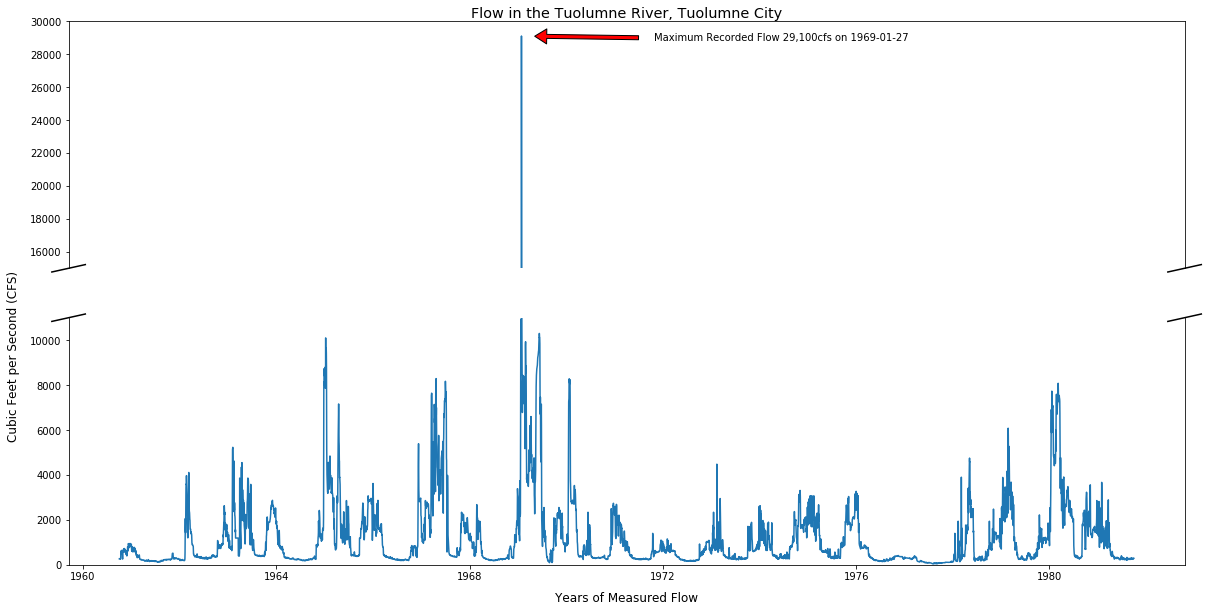

In [0]:
#PART c: Set up the visual configuration of the plot (appearance of axis, tick marks, subplots)

f, (ax, ax2) = plt.subplots(2, 1, sharex=True) #the data has one extreme outlier, making 2 subplots can more easily display this

f.set_figheight(10)   #Edit the height of the generated figure
f.set_figwidth(20)    #Edit the width of the generated figure

ax.plot(dates, flow)  #Tell matplotlib what dat to you want in top subplot
ax2.plot(dates, flow) #Tell matplotlib what dat to you want in bottom subplot

ax.set_ylim(15000, 30000)  # Outlier range for top subplot
ax2.set_ylim(0, 11000)     # Want to zoom to the majority of data here


# Hide the top border of the bottom subplot and bottom of the top subplot
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labeltop='off', bottom=False)  # Remove tick marks or labels at the bottom of the top subplot x-axis

#Part d: Edit advanced features of the plot, make labels, and output the plot

#Make and modify split marks
d = .015  # split-line width
# Create split in Y-axis to show change to outliers
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)               # top left diagonal divider
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)         # top right diagonal divider

kwargs.update(transform=ax2.transAxes)              # switch to the bottom axes to edit settings
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)        # bottom left diagonal divider
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom right diagonal divider

#ADD TITLE AND OTHER FORMATTING
plt.xlabel('Years of Measured Flow', labelpad = 10, fontsize = "large")                                  # Pad adjusts the location 
plt.ylabel('Cubic Feet per Second (CFS)', ha = "left", labelpad = 10, fontsize = "large")                # ha/va = horizontal/vertical alignment
plt.title('Flow in the Tuolumne River, Tuolumne City', va = 'baseline', pad = 300, fontsize = "x-large") # Font size and syle is adjustable


#ax3 = fig.add_subplot(111)
#ADD ANNOTATIONS
ymax = max(flow)
xpos = flow.index(ymax)
xmax = dates[xpos]

ax.annotate('Maximum Recorded Flow {:,d}cfs on {}'.format(ymax, xmax), xy=(xmax, ymax), xytext=(xmax + timedelta(days=1000), ymax-300),
            arrowprops=dict(facecolor='red', headwidth = 15, shrink=.10), 
            )
plt.show() #tells python to show the figure

<h3><center>Part III: Looking into Trends from the Plot</center></h3>

In [0]:
#Get the Overall Flow and Amount of Flow from During the Peak Water-Year a Small Period of Time
import numpy as np
from scipy.integrate import simps

def days_to_seconds(n):
    n = n*60*60*24
    return n
def timedelta_to_days(time_delta_days):
    days = int(time_delta_days/timedelta(days=1))
    return days

begin_record_date = datetime(1968, 10, 1)
end_record_date = datetime(1969, 9, 30)

#converting from date to datetime
max_flow_date = datetime.combine(xmax, datetime.min.time())

#get time before and after
beg_water_year = max_flow_date - begin_record_date
end_water_year = max_flow_date - end_record_date

record_yr_start = abs(timedelta_to_days(beg_water_year))
record_yt_end   = abs(timedelta_to_days(end_water_year))

#get flow for just that one year
flow_year = (flow[(flow.index(ymax)-record_yr_start): (flow.index(ymax)+ record_yt_end + 1)])        #include last water
record_year_dates = dates[dates.index(xmax) - record_yr_start: dates.index(xmax) + record_yt_end +1] #get list of dates for the record-breaking year

array_flow_year = np.array(flow_year)
record_year_year = int(simps(array_flow_year, dx=5))
array_total_flow = np.array(flow)
print("The entire dataset has {:,d} entries for flow while the flow for a single years has {:,d} entries for flow.".format(len(array_total_flow), len(array_flow_year)))

#get the total time over which flow occured in the river
total_time = days_to_seconds(max(ISO_list))
record_year_time = days_to_seconds(len(flow_year))    


# Compute the total and record year flow volume using the composite Simpson's rule.
Total_Volume = int(simps(array_total_flow, dx=total_time))
print('The total volume of water that passed through the Tuolumne river from {} to {} is {:,d} Cubic Feet'.format(min(dates), max(dates), Total_Volume))
# Get the record year flow
Record_year_volume = int(simps(array_flow_year, dx=record_year_time))
print('The total volume of water that passed through the Tuolumne river from {} to {} is {:,d} Cubic Feet'.format(begin_record_date.date(), end_record_date.date(), Record_year_volume))


#Note: Store everything as datetime rather than date because the conversion from datetime to date is much simpler than the reverse. 

The entire dataset has 7,670 entries for flow while the flow for a single years has 365 entries for flow.
The total volume of water that passed through the Tuolumne river from 1960-10-01 to 1981-09-30 is 6,054,327,625,394,880 Cubic Feet
The total volume of water that passed through the Tuolumne river from 1968-10-01 to 1969-09-30 is 39,556,971,360,000 Cubic Feet


<h3><center>Part IV: Improved Plotting with Seaborn</center></h3>

### In this section we will cover a simplied version of the following:
1. Using pandas dataframes instead of simple lists or numpy arrays.
1. The seaborn package, an augmented matplotlib enivornment.
1. Scatterplots and simplicity in seaborn.


In [0]:
#Read in data and name columns
main_df = pd.read_csv('FLOW_DAILY_MEAN_DATA_raw.csv', skiprows=3, header= None, names = ['date', 'flow', 'quality', 'other'])
main_df['flow'].fillna(main_df['flow'].mean(), inplace=True)

#Drop variables
main_df.drop(['other'], axis=1, inplace=True)   #use the inplace option to edit current variables/columns
main_df.drop(['quality'], axis=1, inplace=True) #if this option is false it creates a copy of the variable/column is returned

#Grab certain info from the date column
main_df['f_dates'] = pd.to_datetime(main_df['date'])
main_df['Year'] = pd.DatetimeIndex(main_df['date']).year
main_df['month'] = pd.DatetimeIndex(main_df['date']).month
main_df['day'] = (pd.DatetimeIndex(main_df['date']).day)

#Convert to Float Values for each day in each month by dividing the number of days in each month
main_df.loc[main_df.month == 1, 'Month_Part'] = main_df['day']/31
main_df.loc[main_df.month == 2, 'Month_Part'] = main_df['day']/28.25
main_df.loc[main_df.month == 3, 'Month_Part'] = main_df['day']/31
main_df.loc[main_df.month == 4, 'Month_Part'] = main_df['day']/30
main_df.loc[main_df.month == 5, 'Month_Part'] = main_df['day']/31
main_df.loc[main_df.month == 6, 'Month_Part'] = main_df['day']/30
main_df.loc[main_df.month == 7, 'Month_Part'] = main_df['day']/31
main_df.loc[main_df.month == 8, 'Month_Part'] = main_df['day']/31
main_df.loc[main_df.month == 9, 'Month_Part'] = main_df['day']/30
main_df.loc[main_df.month == 10, 'Month_Part'] = main_df['day']/31
main_df.loc[main_df.month == 11, 'Month_Part'] = main_df['day']/30
main_df.loc[main_df.month == 12, 'Month_Part'] = main_df['day']/31

#add the value of month to the value day to get the approxiimate float value of month-day
main_df['month_day_float'] = main_df['month'] + main_df['Month_Part'] - 1 
print("Below you can see the first few rows of the data with the variables we created:")
main_df.head()

Below you can see the first few rows of the data with the variables we created:


,date,flow,f_dates,Year,month,day,Month_Part,month_day_float
0,10/01/1960,265.0,1960-10-01,1960,10,1,0.032258,9.032258
1,10/02/1960,260.0,1960-10-02,1960,10,2,0.064516,9.064516
2,10/03/1960,260.0,1960-10-03,1960,10,3,0.096774,9.096774
3,10/04/1960,255.0,1960-10-04,1960,10,4,0.129032,9.129032
4,10/05/1960,255.0,1960-10-05,1960,10,5,0.161290,9.161290


#### Using the dataframe as a base for the plot:

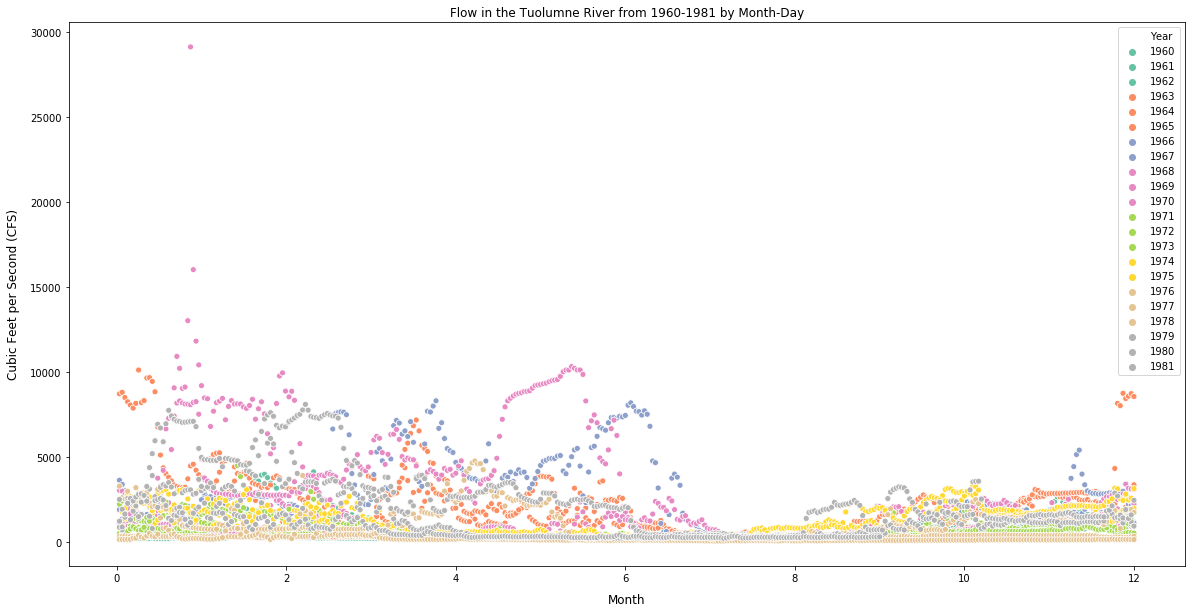

In [0]:
#Create the plot in seaborn format
plt.figure(figsize=(20, 10)) #resize the figure (width, length)
ax = sns.scatterplot(x = 'month_day_float', y='flow', hue = 'Year', data = main_df, palette="Set2", legend="full")

#Add axis labels and title
plt.xlabel('Month', labelpad = 10, fontsize = "large")                                       # Pad adjusts the location 
plt.ylabel('Cubic Feet per Second (CFS)', ha = "center", labelpad = 10, fontsize = "large")  # ha/va = horizontal/vertical alignment
plt.title('Flow in the Tuolumne River from 1960-1981 by Month-Day')
plt.show()

#### Removing outliers allows us to see more defined periodic trends.
#### Below re-creates the figure above but without outliers:

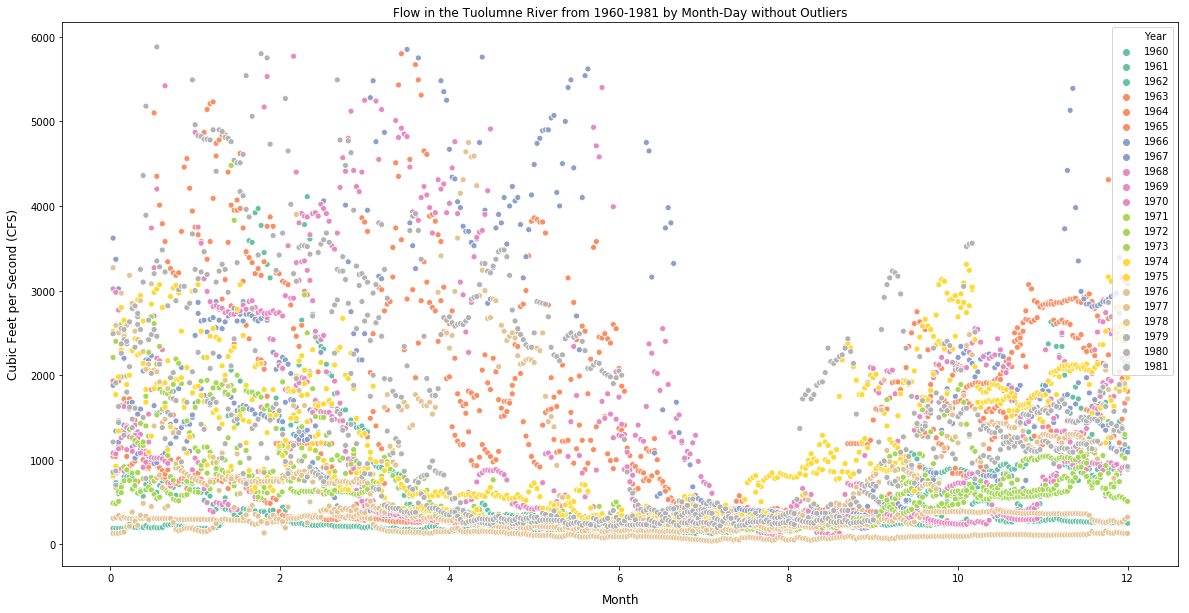

In [0]:
#Code is the same as previous section except for line 4, which removes outliers

### remove outliers (those flow values greater than 3 standard deviations away from the mean)
main_df = main_df[np.abs(stats.zscore(main_df['flow'])) < 3]
### main change above

plt.figure(figsize=(20, 10)) #resize the figure (width, length)
ax = sns.scatterplot(x = 'month_day_float', y='flow', hue = 'Year', data = main_df, palette="Set2", legend='full')
plt.legend(loc='upper right')

#Add axis labels and title
plt.xlabel('Month', labelpad = 10, fontsize = "large")                                 
plt.ylabel('Cubic Feet per Second (CFS)', ha = "center", labelpad = 10, fontsize = "large") 
plt.title('Flow in the Tuolumne River from 1960-1981 by Month-Day without Outliers')
plt.show()

<center><h1> Thank you for taking a look at my coding sample!</h1></center>